The accuracy of the sklearn KNN implementation is 0.97


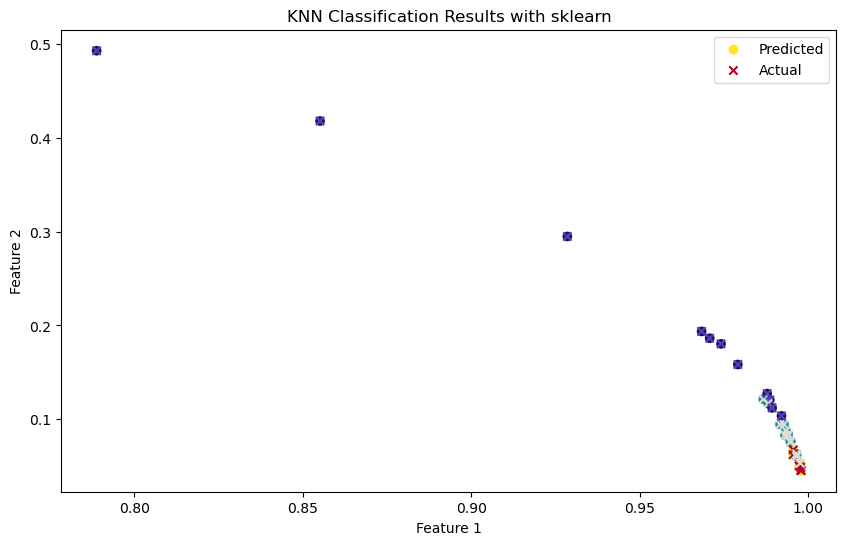

Test Data Predictions (sklearn):
Test Data Point 1: Predicted Class - Iris-virginica
Test Data Point 2: Predicted Class - Iris-versicolor
Test Data Point 3: Predicted Class - Iris-setosa
Test Data Point 4: Predicted Class - Iris-virginica
Test Data Point 5: Predicted Class - Iris-setosa


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the iris dataset
df = pd.read_csv("datairis.csv")
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, shuffle=True, random_state=0
)

# Normalize the data
scaler = Normalizer().fit(x_train)  # Fit the scaler to the training data
normalized_x_train = scaler.transform(x_train)  # Apply scaler to the training set
normalized_x_test = scaler.transform(x_test)    # Apply scaler to the test set

# Initialize KNeighborsClassifier with K=3
k = 3
knn = KNeighborsClassifier(n_neighbors=k)

# Train the classifier
knn.fit(normalized_x_train, y_train)

# Make predictions
y_pred_sklearn = knn.predict(normalized_x_test)

# Calculate accuracy
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print(f'The accuracy of the sklearn KNN implementation is {accuracy_sklearn:.2f}')

# Mapping string labels to numeric values for plotting
label_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
y_test_numeric = np.vectorize(label_mapping.get)(y_test)
y_pred_numeric = np.vectorize(label_mapping.get)(y_pred_sklearn)

# Plotting results with corrected color mapping for actual and predicted labels
plt.figure(figsize=(10, 6))
plt.scatter(normalized_x_test[:, 0], normalized_x_test[:, 1], c=y_pred_numeric, cmap='viridis', marker='o', label='Predicted')
plt.scatter(normalized_x_test[:, 0], normalized_x_test[:, 1], c=y_test_numeric, cmap='coolwarm', marker='x', label='Actual')
plt.title('KNN Classification Results with sklearn')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Testing with some sample test data
test_data = normalized_x_test[:5]
test_predictions = knn.predict(test_data)

print("Test Data Predictions (sklearn):")
for i, pred in enumerate(test_predictions):
    print(f"Test Data Point {i+1}: Predicted Class - {pred}")
